In [71]:
import pandas as pd
import numpy as np
from abpred import Predictor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error,explained_variance_score


In [25]:
features_adapt = pd.read_csv("/mnt/d/Python_projects/abpred/tests/3bdy_renum_features.csv",index_col=0)

In [26]:
pred = Predictor.InterfacePredictor()
pred.load()
# Get predictions
features_adapt['ddg_abpred'] = pred.score(features_adapt.values)
#features_adapt[['ddg']].to_csv("mutations_results.csv")

In [56]:
# adapt paper dataframe
adapt_dataframe = pd.read_csv('../data/3bdy_adapt.csv',sep=";")
# add new column to match models named mutation
adapt_dataframe["mutant"] = adapt_dataframe["Chain"]+adapt_dataframe["Mutation"].str[1:]
adapt_dataframe.sort_values(by="mutant",inplace=True)
adapt_dataframe.rename(columns={'ddG':'ddG_exp'},inplace=True)


In [57]:
features_adapt.reset_index(inplace=True)


In [58]:
features_adapt["mutant"] = features_adapt["index"].str.split(".",expand=True)[1]

In [60]:
features_adapt_preds = features_adapt[["mutant","ddg_abpred"]].copy()

In [63]:
data_merged = features_adapt_preds.merge(adapt_dataframe)
data_merged["ddG_exp"] = data_merged["ddG_exp"].astype(float)


In [79]:
with open("../data/3bdy.pdb.beat.txt","r") as f:
    lines = f.readlines()
    ddg_values = [float(list(filter(lambda name: name.strip(), l.split(" ")))[7]) for l in lines ]
    chain =  [list(filter(lambda name: name.strip(), l.split(" ")))[2] for l in lines ]
    mut_res = [list(filter(lambda name: name.strip(), l.split(" ")))[5] for l in lines ]
    num_res = [list(filter(lambda name: name.strip(), l.split(" ")))[3] for l in lines ]
    
    mutant = list(map("".join, zip(chain, num_res,mut_res)))
    
    pd_beatmusic = pd.DataFrame({"mutant":mutant,"beat_pred":ddg_values})
    

In [80]:
pd_beatmusic

,mutant,beat_pred
0,H98K,0.09
1,H98H,0.12
2,H98W,0.18
3,H98Y,0.22
4,H98F,0.22
5,H98M,0.19
6,H99R,0.37
7,H99M,-0.12
8,H99D,0.54
9,H52R,0.79


In [83]:
data_merged_2 = data_merged.merge(pd_beatmusic)

In [87]:
explained_variance_score(data_merged_2["ddG_exp"],data_merged_2["ddg_abpred"])

0.3827895279157465

In [90]:
data_merged_2.drop(columns=["mutant","Mutation","Chain"]).corr()

,ddg_abpred,z-score,Kwt (nM),ddG_exp,beat_pred
ddg_abpred,1.000000,0.430611,NaN,0.619907,0.283442
z-score,0.430611,1.000000,NaN,0.632829,0.467480
Kwt (nM),NaN,NaN,NaN,NaN,NaN
ddG_exp,0.619907,0.632829,NaN,1.000000,0.651116
beat_pred,0.283442,0.467480,NaN,0.651116,1.000000


In [89]:
np.sqrt(data_merged_2.drop(columns=["mutant","Mutation","Chain"]).apply(mean_squared_error,axis=0,args=(data_merged_2.drop(columns=["mutant","Mutation","Chain"])["ddG_exp"],)))

ddg_abpred     0.460123
z-score        4.531425
Kwt (nM)      44.544541
Kwt/K          5.323531
ddG_exp        0.000000
beat_pred      0.984717
dtype: float64

In [91]:
import seaborn as sns
%matplotlib inline

In [103]:
sns.regplot?

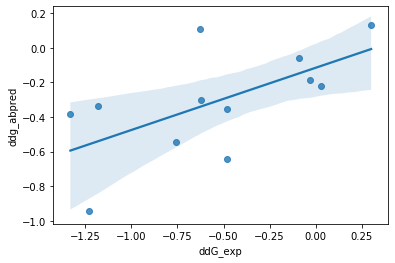

In [101]:
sns.regplot(data_merged_2["ddG_exp"],data_merged_2["ddg_abpred"])